In [1]:
# 시각를 위해서 셋팅
import matplotlib.pyplot as plt
plt.rc('font',size=14)
plt.rc('axes', labelsize=14,titlesize=14)
plt.rc('legend',fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

선형회귀
  - 정규방정식

In [2]:
import numpy as np
np.random.seed(42)
m = 100 # 샘플수
X = 2 * np.random.rand(m,1)
y = 4 +3 * X + np.random.randn(m,1)

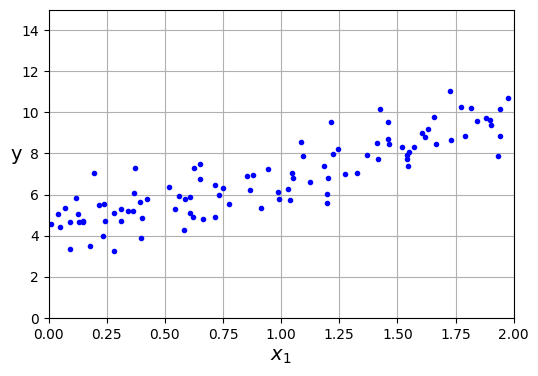

In [8]:
plt.figure(figsize = (6,4))
plt.plot(X,y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('y',rotation = 0)
plt.axis([0, 2, 0, 15]) # x, y축의 범위를 설정
plt.grid()
plt.show()

In [10]:
# 선형회귀를 사용해서 데이터에 가장 잘 맞는 모델을 찾는 과정
from sklearn.preprocessing import add_dummy_feature  # bias 편형을 나타내는 특성을 추가
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y   # 선형회귀를 훈련시키는 코드  - 최적의 가중치 벡터를 계산 @ 행렬곱
theta_best

array([[4.21509616],
       [2.77011339]])

In [11]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)  # 각 샘플에 x0 = 1을 추가
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

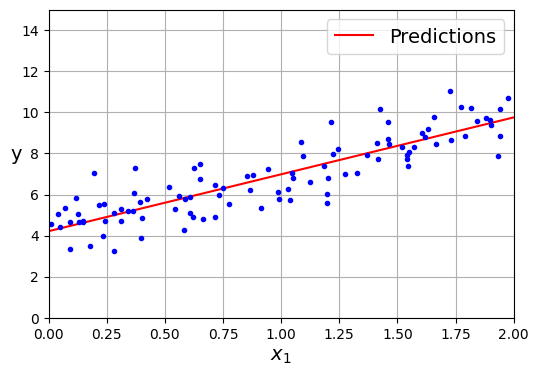

In [12]:
plt.figure(figsize=(6,4))
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X,y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('y',rotation = 0)
plt.axis([0, 2, 0, 15]) # x, y축의 범위를 설정
plt.grid()
plt.legend()
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

LinearRegression 클래스는  scipy.linalg.lstsq()함수 사용
  - 최소제곱문제를 푸는데 사용되는 함수, 잔차(실제와 예측의 차이)의 제곱의합을 최소화하는 모델 파라메터

In [16]:
# 최적의 가중치, 잔차벡터, 행렬X의 랭크, 특이값분해(SVD)에서 특이값
theta_best_svd, residuals, rank, s =  np.linalg.lstsq(X_b,y,rcond=1e-6)  # rcond 특이값 분해(SVD)에서 특이값이 얼마나 작아야 하는지를 결정하는 임계치
# 작을수록 더 많은 특성이 고려, 높은 값은 더 적은 특이값만 고려

In [17]:
theta_best_svd

array([[4.21509616],
       [2.77011339]])

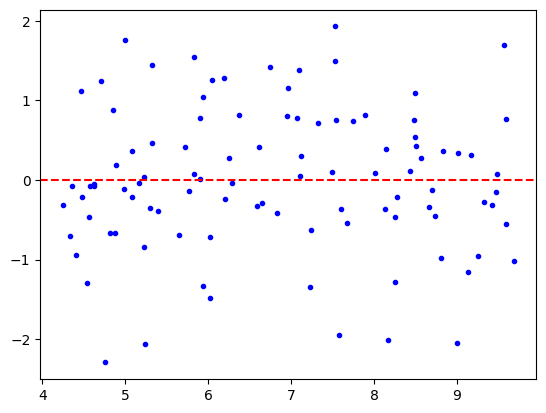

In [26]:
# 잔차 산점도에서는 특정한 패턴이 없거나 랜던하게 분포되는 것이 이상적이다.
X_predict = lin_reg.predict(X)
np.abs( X_predict - y)
plt.plot(X_predict,X_predict - y,'b.')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

유사역행렬

In [18]:
np.linalg.pinv(X_b)@y

array([[4.21509616],
       [2.77011339]])

경사하강법
  - 배치 경사 하강법

In [29]:
eta = 0.1 # 학습률
n_epochs = 1000
m = len(X_b) # 샘플 개수
np.random.seed(42)
theta = np.random.randn(2,1)  # 모델 파라메터를 랜덤하게 초기화
for epoch in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta-y)
  theta = theta- eta*gradients
theta

array([[4.21509616],
       [2.77011339]])

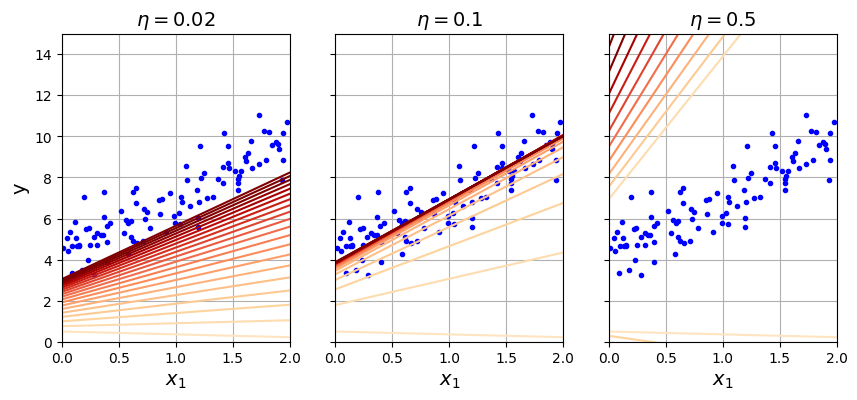

In [31]:
import matplotlib as mpl
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2,1)  # 초기화
plt.figure(figsize=(10,4))

plt.subplot(131)
plot_gradient_descent(theta,eta=0.02)
plt.ylabel('y',rotation=90)

plt.subplot(132)
plt.gca().axes.yaxis.set_ticklabels([])
theta_path_bgd = plot_gradient_descent(theta,eta = 0.1)

plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
theta_path_bgd = plot_gradient_descent(theta,eta = 0.5)

plt.show()


확률적 경사 하강법
  - 전체데이터셋을 한번에 처리하지 않고 각 훈련셈플에대해서 모델을 업데이트하는 방식의 경사 하강법
  - 대규모 데이터셋, 계산비용 줄인다

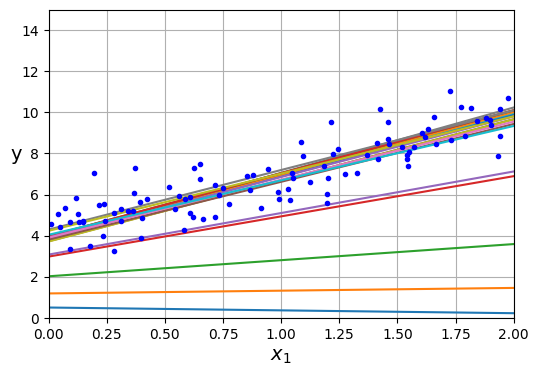

In [33]:
theta_path_sgd = []  #  가중치 경로를 저장
n_epochs = 50
t0, t1 = 5,50  # 학습 스케줄 파라메터
def learning_schedule(t):  # t는 에포크와 관련이 있고, 에포크가 증가하면 학습률이 감소
  return t0 / (t+t1)
np.random.seed(42)
theta = np.random.randn(2,1)  # 초기화
n_shown = 20
plt.figure(figsize=(6,4))

for epoch in range(n_epochs):
  for iteration in range(m):

    if epoch == 0 and iteration < n_shown:
      y_predict = X_new_b @ theta
      plt.plot(X_new, y_predict)

    random_index =  np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi)  # 역전파 (기울기 계산)
    eta = learning_schedule(epoch*m + iteration)
    theta = theta - eta * gradients  # 역전파 적용
    theta_path_sgd.append(theta)

plt.plot(X,y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('y',rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.show()

다항회귀

In [34]:
import numpy as np
np.random.seed(42)
m = 100 # 샘플수
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 +  np.random.randn(m,1)

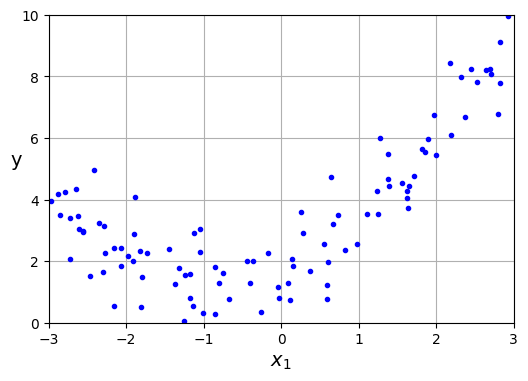

In [36]:
plt.figure(figsize=(6,4))
plt.plot(X,y,"b.")
plt.xlabel('$x_1$')
plt.ylabel('y',rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [39]:
# 2차 다항식 만들기
from sklearn.preprocessing import PolynomialFeatures
poly_feature =  PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feature.fit_transform(X)
X[0]

array([-0.75275929])

In [40]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [41]:
lin_reg =  LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

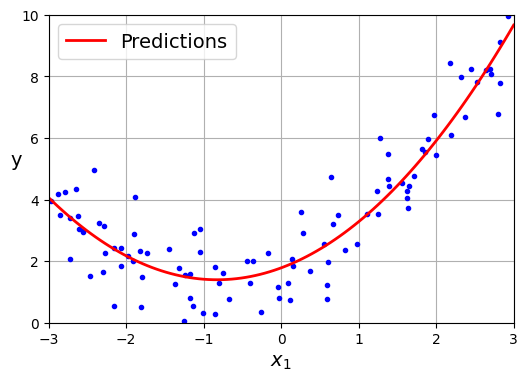

In [44]:
X_new =  np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_feature.transform(X_new)
y_new =  lin_reg.predict(X_new_poly)

plt.figure(figsize=(6,4))
plt.plot(X,y,"b.")
plt.plot(X_new,y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$x_1$')
plt.ylabel('y',rotation=0)
plt.axis([-3,3,0,10])
plt.legend()
plt.grid()
plt.show()

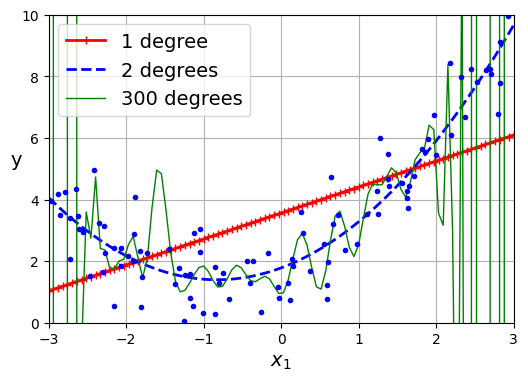

In [45]:
from numpy.lib import polynomial
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
plt.figure(figsize=(6,4))
for style,width,degree in ( ('r-+',2,1),('b--',2,2),('g-',1,300)):
  poly_feature = PolynomialFeatures(degree=degree, include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = make_pipeline(poly_feature,std_scaler,lin_reg)
  polynomial_regression.fit(X,y)
  y_newbig = polynomial_regression.predict(X_new)
  label = f"{degree} degree{'s' if degree > 1 else '' }"
  plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X,y,"b.")
plt.xlabel('$x_1$')
plt.ylabel('y',rotation=0)
plt.axis([-3,3,0,10])
plt.legend()
plt.grid()
plt.show()

학습곡선

In [48]:
X.shape

(100, 1)

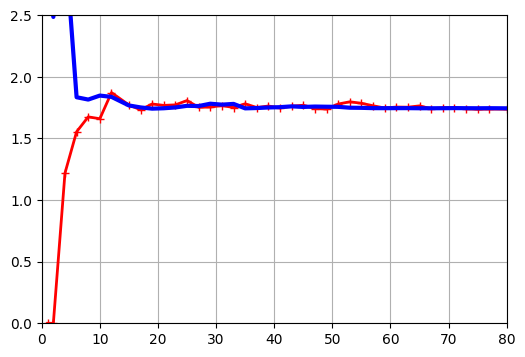

In [46]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores,valid_scores =  learning_curve(
    LinearRegression(), X,y,train_sizes = np.linspace(0.01,1.0,40), cv=5, scoring='neg_root_mean_squared_error'
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_errors, 'r-+',linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-',linewidth=3, label='valid')
plt.grid()
plt.axis([0,80,0,2.5])
plt.show()